#Final   
VIP CUP   
______
**SPA Group**  
Sajad Jabarzade Ghandilou   
Parham Soltani   
Amirtaha Aghasi
______   

##Libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##Preparing Data

In [3]:
from google.colab import files
from google.colab.patches import cv2_imshow

In [4]:
uploaded = files.upload()

Saving goldfish.jpg to goldfish.jpg
Saving Goldfish.mp4 to Goldfish.mp4


##Functions

In [63]:
def get_fps(inputvideo):
  return int(inputvideo.get(cv2.CAP_PROP_FPS))

In [98]:
def count_goldfish(image_path):
  image = cv2.imread(image_path)
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  lower = np.array([10, 10, 100], dtype="uint8")
  upper = np.array([25, 255, 255], dtype="uint8")
  mask = cv2.inRange(hsv, lower, upper)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  goldfish_count = 0
  for contour in contours:
    if cv2.contourArea(contour) > 200:
      goldfish_count += 1
      cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(f'Goldfish Count: {goldfish_count}')
  plt.show()
  return goldfish_count

##Task 0

###Phase 1

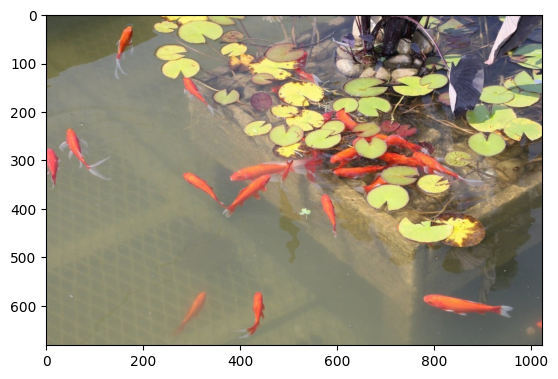

In [105]:
img = cv2.imread("/content/goldfish.jpg",1)
plt.imshow(img[:,:,::-1])
plt.show()

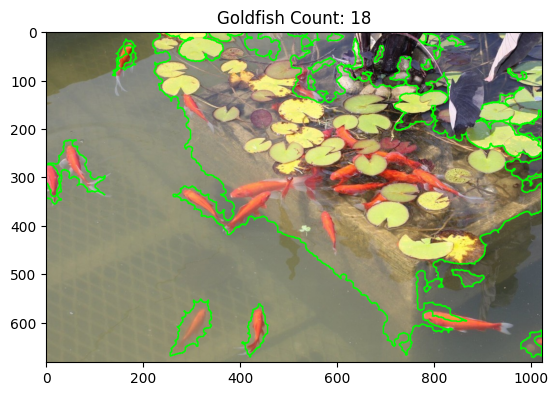

In [106]:
image_path = "/content/goldfish.jpg"
count = count_goldfish(image_path)

In [107]:
total = 19
accur = count/total * 100
label = f"Goldfish Count: {count}          Accuracy = {accur:.2f}"
cv2.putText(img, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
cv2.imwrite("GoldfishOutPic.jpg", img)

True

###Phase 2

In [115]:
video_input_file_name = "/content/Goldfish.mp4"

In [116]:
cap = cv2.VideoCapture(video_input_file_name)

In [117]:
fps = get_fps(cap)

In [118]:
video_output_file_name = "Our Output.mp4"
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_out = cv2.VideoWriter(video_output_file_name, cv2.VideoWriter_fourcc(*"XVID"), fps, (width, height))

In [119]:
while True:
    ret, frame = cap.read()
    if ret:
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      blurred = cv2.GaussianBlur(gray, (5, 5), 0)
      edged = cv2.Canny(blurred, 50, 150)
      contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      cv2.drawContours(frame, contours, -1, (0, 255, 0), 2)
      video_out.write(frame)
    else: break
cap.release()
video_out.release()